<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Node-Metrics/Centrality" data-toc-modified-id="Node-Metrics/Centrality-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Node Metrics/Centrality</a></span><ul class="toc-item"><li><span><a href="#Definitions-(part-1)" data-toc-modified-id="Definitions-(part-1)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Definitions (part 1)</a></span></li><li><span><a href="#Definitions-(part-2)" data-toc-modified-id="Definitions-(part-2)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Definitions (part 2)</a></span></li></ul></li><li><span><a href="#Network-metrics" data-toc-modified-id="Network-metrics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Network metrics</a></span><ul class="toc-item"><li><span><a href="#density" data-toc-modified-id="density-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>density</a></span></li><li><span><a href="#Average-degree" data-toc-modified-id="Average-degree-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Average degree</a></span></li><li><span><a href="#Degree-distribution" data-toc-modified-id="Degree-distribution-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Degree distribution</a></span></li><li><span><a href="#Average-clustering-coefficient" data-toc-modified-id="Average-clustering-coefficient-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Average clustering coefficient</a></span></li></ul></li></ul></div>

In [121]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Node Metrics/Centrality

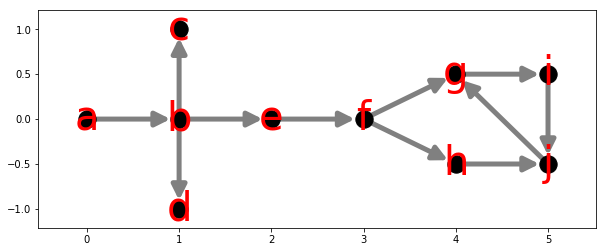

In [122]:
# a directed example network used to illustrate the concepts
G = nx.DiGraph()

G.add_edge('a','b')
G.add_edge('b','c')
G.add_edge('b','d')
G.add_edge('b','e')
G.add_edge('e','f')
G.add_edge('f','g')
G.add_edge('f','h')
G.add_edge('g','i')
G.add_edge('h','j')
G.add_edge('i','j')
G.add_edge('j','g')

plt.figure(figsize = (10,4))
# pos = nx.spring_layout(G)
pos = {'a':np.array([0,0]),
       'b':np.array([1,0]),
       'c':np.array([1,1]),
       'd':np.array([1,-1]),
       'e':np.array([2,0]),
       'f':np.array([3,0]),
       'g':np.array([4,0.5]),
       'h':np.array([4,-0.5]),
       'i':np.array([5,0.5]),
       'j':np.array([5,-0.5]),}

labels={'a':'a','b':'b','c':'c','d':'d','e':'e','f':'f','g':'g','h':'h','i':'i','j':'j'}
nx.draw_networkx_nodes(G, pos, node_color = 'black')
nx.draw_networkx_edges(G, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=40, font_color='red')
plt.show()

## Definitions (part 1) 
- **In-degree centrality**: number of incoming directed links to one node.
- **Out-degree centrality**: number of outgoing directed links to one node.
- **Degree centrality**: number of total directed/undirected links to one node.

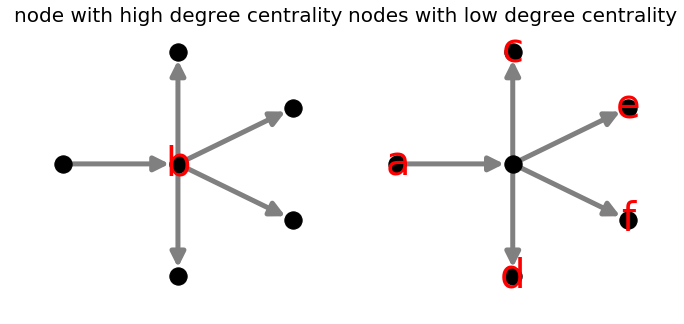

In [125]:
# a directed example network used to illustrate the concepts
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
G = nx.DiGraph()
G.add_edge('a','b')
G.add_edge('b','c')
G.add_edge('b','d')
G.add_edge('b','e')
G.add_edge('b','f')
pos = {'a':np.array([0,0]),
       'b':np.array([1,0]),
       'c':np.array([1,1]),
       'd':np.array([1,-1]),
       'e':np.array([2,0.5]),
       'f':np.array([2,-0.5])}

labels={'b':'b'}
nx.draw_networkx_nodes(G, pos, node_color = 'black')
nx.draw_networkx_edges(G, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=40, font_color='red')
plt.title('node with high degree centrality',fontsize=20)
plt.axis('off')

plt.subplot(1,2,2)
G = nx.DiGraph()
G.add_edge('a','b')
G.add_edge('b','c')
G.add_edge('b','d')
G.add_edge('b','e')
G.add_edge('b','f')
pos = {'a':np.array([0,0]),
       'b':np.array([1,0]),
       'c':np.array([1,1]),
       'd':np.array([1,-1]),
       'e':np.array([2,0.5]),
       'f':np.array([2,-0.5])}

labels={'a':'a','c':'c','d':'d','e':'e','f':'f'}
nx.draw_networkx_nodes(G, pos, node_color = 'black')
nx.draw_networkx_edges(G, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=40, font_color='red')
plt.title('nodes with low degree centrality',fontsize=20)
plt.axis('off')

plt.show()

In [266]:
num_nodes = 10
node_list = ['a','b','c','d','e','f','g','h','i','j']
node_attrs = pd.DataFrame()
node_attrs = node_attrs.reindex(node_list)

in_degree = (num_nodes-1)*np.array(list(nx.centrality.in_degree_centrality(G).values()))
out_degree = (num_nodes-1)*np.array(list(nx.centrality.out_degree_centrality(G).values()))
node_attrs['in_degree'] = in_degree
node_attrs['out_degree'] = out_degree
node_attrs['degree'] = node_attrs['in_degree']  + node_attrs['out_degree'] 

node_attrs


,in_degree,out_degree,degree
a,0.0,1.0,1.0
b,1.0,3.0,4.0
c,1.0,0.0,1.0
d,1.0,0.0,1.0
e,1.0,1.0,2.0
f,1.0,2.0,3.0
g,2.0,1.0,3.0
h,1.0,1.0,2.0
i,1.0,1.0,2.0
j,2.0,1.0,3.0


In [267]:
adjacency_matrix = np.array(nx.adjacency_matrix(G).todense())
adjacency_df = pd.DataFrame(data = adjacency_matrix, columns=node_list,index=node_list)
adjacency_df['out_degree'] = adjacency_df.sum(axis=1)
df2 = pd.DataFrame(data = adjacency_df.sum(axis=0).values.reshape(1,-1), columns=node_list + ['out_degree'], index = ['in_degree'])
adjacency_df = adjacency_df.append(df2)
adjacency_df


,a,b,c,d,e,f,g,h,i,j,out_degree
a,0,1,0,0,0,0,0,0,0,0,1
b,0,0,1,1,1,0,0,0,0,0,3
c,0,0,0,0,0,0,0,0,0,0,0
d,0,0,0,0,0,0,0,0,0,0,0
e,0,0,0,0,0,1,0,0,0,0,1
f,0,0,0,0,0,0,1,1,0,0,2
g,0,0,0,0,0,0,0,0,1,0,1
h,0,0,0,0,0,0,0,0,0,1,1
i,0,0,0,0,0,0,0,0,0,1,1
j,0,0,0,0,0,0,1,0,0,0,1


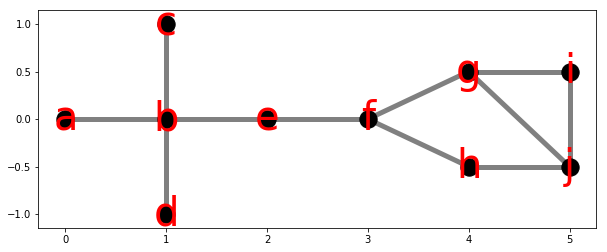

In [268]:
# an undirected example network used to illustrate the concepts
G2 = nx.Graph()
G2.add_edges_from(G.edges())
plt.figure(figsize = (10,4))
nx.draw_networkx_nodes(G2, pos, node_color = 'black')
nx.draw_networkx_edges(G2, pos, width=5,edge_color = 'grey')
nx.draw_networkx_labels(G2, pos, labels=labels, font_size=40, font_color='red')
plt.show()

## Definitions (part 2)
- **Closeness centrality**: sum #steps to all other nodes
 - sometimes it's better to use its inverse, according to the centrality concept
$$C_C(u) = \sum_{v=1}^{n-1} d(v,u)$$
or 
$$C_C(u) = \frac{1}{\sum_{v=1}^{n-1} d(v,u)}$$
or
$$C_C(u) = \frac{n-1}{\sum_{v=1}^{n-1} d(v,u)}$$

- **Betweenness centrality**: sum of #shortest path through node
$$C_B(v) = \sum_{s,t\in V, v\neq s,t} \sigma(s,t|v)$$
 - some version use the the sum of fraction of shortest path through node
$$C_B(v) = \sum_{s,t\in V, v\neq s,t} \frac{\sigma(s,t|v)}{\sigma(s,t)}$$

- **Eigenvector centrality**: 
Comes from eigen-decomposition
$$Ax = \lambda x$$
where $A$ is the adjacency matrix, $\lambda$ is the largest eigenvalue and $x$ is the corresponding eigenvector.  
By rearange the equation above, the eigenvector centrality of node v can also be defined:
$$C_E(v) = \frac{1}{\lambda} \sum_{u\in V} a_{u,v} C_E(u)$$
which can be intepreted as the sum of neighbors' relative centrality

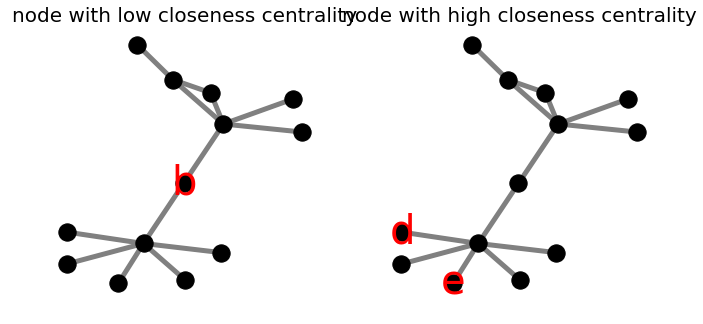

In [126]:
# an undirected example network used to illustrate the concepts
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
G = nx.Graph()
G.add_edge('a','b')
G.add_edge('a','l')
G.add_edge('a','g')
G.add_edge('a','h')
G.add_edge('a','i')

G.add_edge('b','c')
G.add_edge('c','d')
G.add_edge('c','e')
G.add_edge('c','f')
G.add_edge('c','p')
G.add_edge('c','o')
G.add_edge('c','p')

G.add_edge('j','i')
G.add_edge('h','i')


pos = nx.spring_layout(G)
# pos = {'a':np.array([0,0]),
#        'b':np.array([1,0]),
#        'c':np.array([1,1]),
#        'd':np.array([1,-1]),
#        'e':np.array([2,0.5]),
#        'f':np.array([2,-0.5])}

labels={'b':'b'}
nx.draw_networkx_nodes(G, pos, node_color = 'black')
nx.draw_networkx_edges(G, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=40, font_color='red')
plt.title('node with low closeness centrality',fontsize=20)
plt.axis('off')

plt.subplot(1,2,2)


labels={'d':'d','e':'e'}

nx.draw_networkx_nodes(G, pos, node_color = 'black')
nx.draw_networkx_edges(G, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=40, font_color='red')
plt.title('node with high closeness centrality',fontsize=20)
plt.axis('off')

plt.show()

In [41]:
closeness = 1/(np.array(list(nx.closeness_centrality(G).values()))/(len(G.nodes())-1))
print(closeness)

[24. 23. 35. 35. 33. 32. 24. 35. 35. 35. 35. 35. 43.]


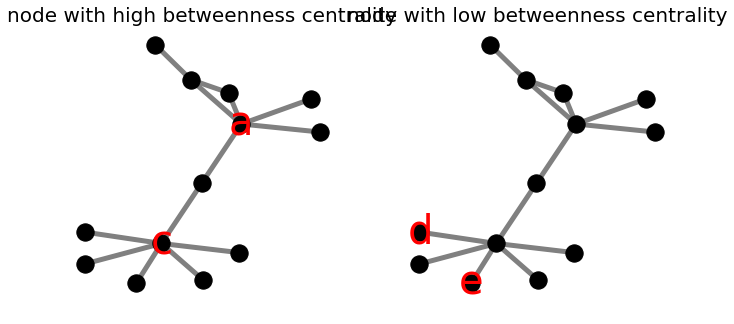

In [127]:
# an undirected example network used to illustrate the concepts
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
G = nx.Graph()
G.add_edge('a','b')
G.add_edge('a','l')
G.add_edge('a','g')
G.add_edge('a','h')
G.add_edge('a','i')

G.add_edge('b','c')
G.add_edge('c','d')
G.add_edge('c','e')
G.add_edge('c','f')
G.add_edge('c','p')
G.add_edge('c','o')
G.add_edge('c','p')

G.add_edge('j','i')
G.add_edge('h','i')


# pos = nx.spring_layout(G)
# pos = {'a':np.array([0,0]),
#        'b':np.array([1,0]),
#        'c':np.array([1,1]),
#        'd':np.array([1,-1]),
#        'e':np.array([2,0.5]),
#        'f':np.array([2,-0.5])}

labels={'a':'a','c':'c'}
nx.draw_networkx_nodes(G, pos, node_color = 'black')
nx.draw_networkx_edges(G, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=40, font_color='red')
plt.title('node with high betweenness centrality',fontsize=20)
plt.axis('off')

plt.subplot(1,2,2)

labels={'d':'d','e':'e'}
nx.draw_networkx_nodes(G, pos, node_color = 'black')
nx.draw_networkx_edges(G, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=40, font_color='red')
plt.title('node with low betweenness centrality',fontsize=20)
plt.axis('off')

plt.show()

In [36]:
betweenness = np.array(list(nx.betweenness_centrality(G,normalized=False).values()))
print(betweenness)

[42. 36.  0.  0.  0. 11. 45.  0.  0.  0.  0.  0.  0.]


In [50]:
eigenvector = np.array(list(nx.eigenvector_centrality(G).values()))
print(eigenvector)

[0.52822591 0.34176296 0.19509929 0.19509929 0.33079688 0.36739793
 0.39708336 0.14666367 0.14666367 0.14666367 0.14666367 0.14666367
 0.13569759]


In [51]:
G.nodes()

NodeView(('a', 'b', 'l', 'g', 'h', 'i', 'c', 'd', 'e', 'f', 'p', 'o', 'j'))

In [269]:
closeness_3 = np.array(list(nx.closeness_centrality(G2).values()))
closeness_2 = closeness_3/(len(G2.nodes())-1)
closeness_1 = 1/closeness_2
node_attrs['closeness'] = closeness_3

betweenness = np.array(list(nx.betweenness_centrality(G2,normalized=False).values()))
node_attrs['betweenness'] = betweenness

eigenvector = np.array(list(nx.eigenvector_centrality(G2).values()))
node_attrs['eigenvector'] = eigenvector

node_attrs

,in_degree,out_degree,degree,closeness,betweenness,eigenvector
a,0.0,1.0,1.0,0.321429,0.0,0.062849
b,1.0,3.0,4.0,0.450000,21.0,0.161263
c,1.0,0.0,1.0,0.321429,0.0,0.062849
d,1.0,0.0,1.0,0.321429,0.0,0.062849
e,1.0,1.0,2.0,0.500000,20.0,0.225239
f,1.0,2.0,3.0,0.500000,20.5,0.416683
g,2.0,1.0,3.0,0.409091,9.0,0.495819
h,1.0,1.0,2.0,0.391304,3.0,0.348128
i,1.0,1.0,2.0,0.321429,0.0,0.378968
j,2.0,1.0,3.0,0.333333,1.5,0.476593


# Network metrics

## density

1.0
0.5


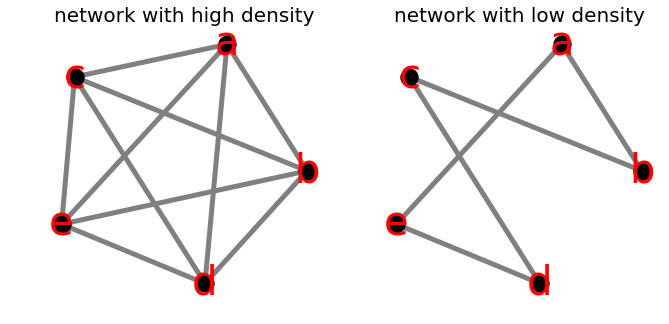

In [130]:
# an undirected example network used to illustrate the concepts
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
G = nx.Graph()
G.add_edge('a','b')
G.add_edge('a','c')
G.add_edge('b','c')
G.add_edge('a','d')
G.add_edge('b','d')
G.add_edge('c','d')
G.add_edge('a','e')
G.add_edge('b','e')
G.add_edge('c','e')
G.add_edge('d','e')

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color = 'black')
nx.draw_networkx_edges(G, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G, pos, font_size=40, font_color='red')
plt.title('network with high density',fontsize=20)
plt.axis('off')

print(nx.density(G))
plt.subplot(1,2,2)
G = nx.Graph()
G.add_edge('a','b')
G.add_edge('b','c')
G.add_edge('c','d')
G.add_edge('a','e')
G.add_edge('d','e')
print(nx.density(G))

nx.draw_networkx_nodes(G, pos, node_color = 'black')
nx.draw_networkx_edges(G, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G, pos, font_size=40, font_color='red')
plt.title('network with low density',fontsize=20)
plt.axis('off')

plt.show()

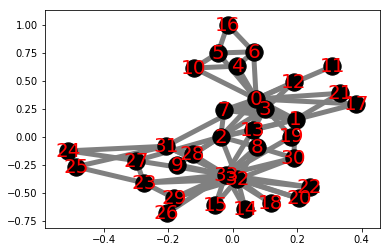

In [60]:
G2 = nx.karate_club_graph()
pos = nx.spring_layout(G2,iterations=200)
nx.draw_networkx_nodes(G2, pos, node_color = 'black')
nx.draw_networkx_edges(G2, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G2, pos, font_size=20, font_color='red')
plt.show()

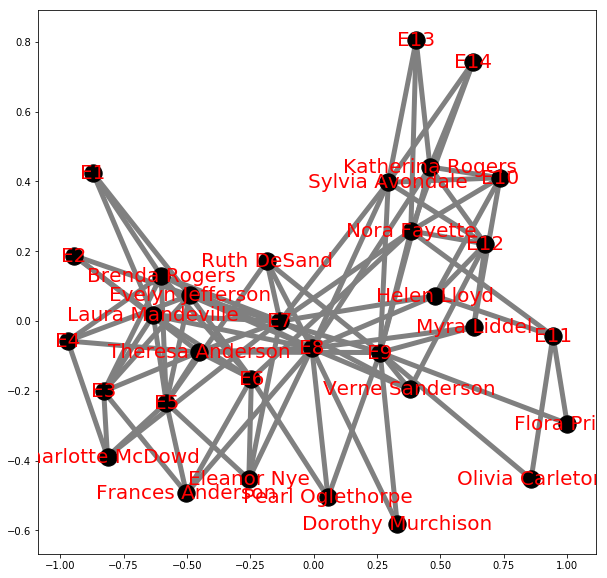

In [64]:
plt.figure(figsize=(10,10))
G2 = nx.davis_southern_women_graph()
pos = nx.spring_layout(G2,iterations=200)
nx.draw_networkx_nodes(G2, pos, node_color = 'black')
nx.draw_networkx_edges(G2, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G2, pos, font_size=20, font_color='red')
plt.show()

## Average degree

Directly from the name, it is a measure for how many neighbors does a node in the network have in average.


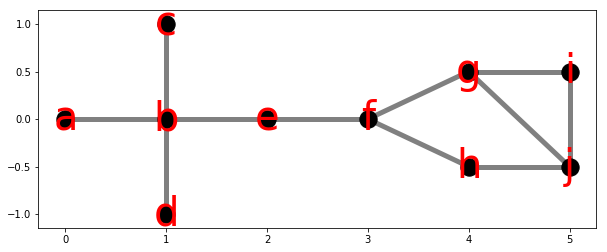

In [270]:
# an undirected example network used to illustrate the concepts
G2 = nx.Graph()
G2.add_edges_from(G.edges())
plt.figure(figsize = (10,4))
nx.draw_networkx_nodes(G2, pos, node_color = 'black')
nx.draw_networkx_edges(G2, pos, width=5,edge_color = 'grey')
nx.draw_networkx_labels(G2, pos, labels=labels, font_size=40, font_color='red')
plt.show()

In [274]:
node_attrs['degree'].mean()

2.2

## Degree distribution
Still on degree centrality, but another view of point

In [285]:
node_attrs

,in_degree,out_degree,degree,closeness,betweenness,eigenvector
a,0.0,1.0,1.0,0.321429,0.0,0.062849
b,1.0,3.0,4.0,0.450000,21.0,0.161263
c,1.0,0.0,1.0,0.321429,0.0,0.062849
d,1.0,0.0,1.0,0.321429,0.0,0.062849
e,1.0,1.0,2.0,0.500000,20.0,0.225239
f,1.0,2.0,3.0,0.500000,20.5,0.416683
g,2.0,1.0,3.0,0.409091,9.0,0.495819
h,1.0,1.0,2.0,0.391304,3.0,0.348128
i,1.0,1.0,2.0,0.321429,0.0,0.378968
j,2.0,1.0,3.0,0.333333,1.5,0.476593


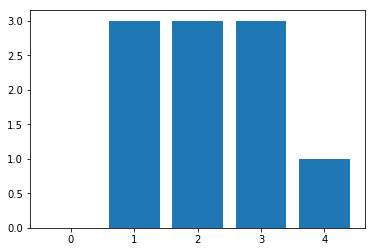

In [283]:
# show degree centrality as a histogram
plt.bar(np.arange(0,len(nx.degree_histogram(G2))), nx.degree_histogram(G2))
plt.show()


## Average clustering coefficient


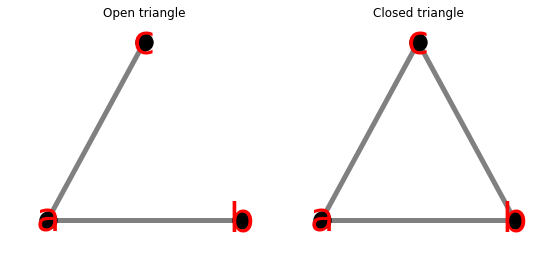

In [131]:
# an example network used to illustrate the following concepts
G_test = nx.Graph()

G_test.add_edge('a','b')
G_test.add_edge('a','c')

plt.figure(figsize = (9,4))
plt.subplot(1,2,1)
plt.title('Open triangle')
pos = {'a':np.array([0,0]),
       'b':np.array([1,0]),
       'c':np.array([0.5,0.7])}

nx.draw_networkx_nodes(G_test, pos,node_color = 'black')
nx.draw_networkx_edges(G_test, pos, width=5,edge_color = 'grey')
nx.draw_networkx_labels(G_test, pos, labels={'a':'a','b':'b','c':'c'}, font_size=40, font_color='red')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Closed triangle')
G_test.add_edge('b','c')
nx.draw_networkx_nodes(G_test, pos,node_color = 'black')
nx.draw_networkx_edges(G_test, pos, width=5,edge_color = 'grey')
nx.draw_networkx_labels(G_test, pos, labels={'a':'a','b':'b','c':'c'}, font_size=40, font_color='red')
plt.axis('off')

plt.show()

Measures how well the nodes' neighbourhood are connected
- Clustering coefficient: 
$$C_i = \frac{\lambda(v)}{\tau(v)}$$
where $\lambda(v)$ is the number of closed trianlges that has a node v, $\tau(v)$ is the number of open/closed triangles and node v is the corner 

So the **Average clustering coefficient** is defined as the average of Clustering coefficient,
$$C = \frac{1}{n}\sum_{i-1}^n C_i$$

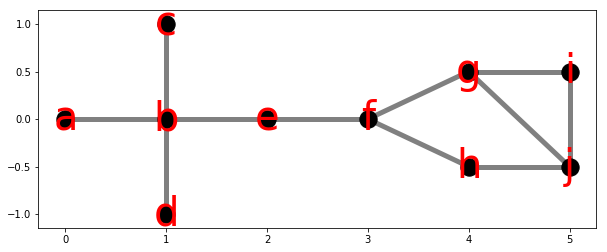

In [277]:
# an undirected example network used to illustrate the concepts
G2 = nx.Graph()
G2.add_edges_from(G.edges())
plt.figure(figsize = (10,4))
nx.draw_networkx_nodes(G2, pos, node_color = 'black')
nx.draw_networkx_edges(G2, pos, width=5,edge_color = 'grey')
nx.draw_networkx_labels(G2, pos, labels=labels, font_size=40, font_color='red')
plt.show()

In [282]:
nx.clustering(G2)

{'a': 0,
 'b': 0,
 'c': 0,
 'd': 0,
 'e': 0,
 'f': 0,
 'g': 0.3333333333333333,
 'h': 0,
 'i': 1.0,
 'j': 0.3333333333333333}

In [276]:
nx.average_clustering(G2)

0.16666666666666666

0.8999999999999999
0.1851851851851852


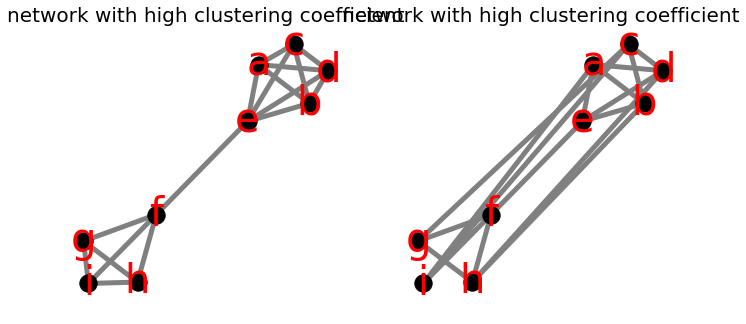

In [134]:
# an undirected example network used to illustrate the concepts
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
G = nx.Graph()
G.add_edge('a','b')
G.add_edge('a','c')
G.add_edge('a','d')
G.add_edge('a','e')

G.add_edge('b','c')
G.add_edge('b','d')
G.add_edge('b','e')

G.add_edge('c','d')
G.add_edge('c','e')

G.add_edge('d','e')

G.add_edge('e','f')

G.add_edge('f','g')
G.add_edge('f','h')
G.add_edge('f','i')

G.add_edge('g','h')
G.add_edge('h','i')
G.add_edge('g','i')

print(nx.average_clustering(G))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color = 'black')
nx.draw_networkx_edges(G, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G, pos, font_size=40, font_color='red')
plt.title('network with high clustering coefficient',fontsize=20)
plt.axis('off')

plt.subplot(1,2,2)
G = nx.Graph()
G.add_edge('a','b')
G.add_edge('a','i')
G.add_edge('a','d')
G.add_edge('a','e')

G.add_edge('b','c')
G.add_edge('b','h')
G.add_edge('b','e')

G.add_edge('c','d')
G.add_edge('c','g')

G.add_edge('d','e')

G.add_edge('e','f')

G.add_edge('f','g')
G.add_edge('f','h')
G.add_edge('f','i')

G.add_edge('g','h')
G.add_edge('h','d')
G.add_edge('c','i')

nx.draw_networkx_nodes(G, pos, node_color = 'black')
nx.draw_networkx_edges(G, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G, pos, font_size=40, font_color='red')
plt.title('network with high clustering coefficient',fontsize=20)
print(nx.average_clustering(G))
plt.axis('off')


plt.show()

In [275]:
# # an example network used to illustrate the following concepts
# G3 = nx.Graph()

# G3.add_edge('a','b',weight = 1)
# # G3.add_edge('b','a',weight = 1)
# G3.add_edge('a','c',weight = 1)
# G3.add_edge('b','c',weight = 1)
# G3.add_edge('a','d',weight = 1)
# G3.add_edge('c','d',weight = 1)
# # G3.add_edge('b','d',weight = 1)

# plt.figure(figsize = (5,5))
# # pos = nx.spring_layout(G)
# pos = {'a':np.array([0,0]),
#        'b':np.array([1,0]),
#        'c':np.array([0,1]),
#        'd':np.array([1,1]),}

# nx.draw_networkx_nodes(G3, pos,node_color = 'black')
# nx.draw_networkx_edges(G3, pos, width=5,arrowsize=50, arrowstyle='->',edge_color = 'grey')
# nx.draw_networkx_labels(G3, pos, labels={'a':'a','b':'b','c':'c','d':'d'}, font_size=40, font_color='red')
# plt.show()

In [102]:
from networkx.algorithms.community import greedy_modularity_communities
G = nx.Graph()
G.add_edge('a','b')
G.add_edge('a','c')
G.add_edge('a','d')
G.add_edge('a','e')

G.add_edge('b','c')
G.add_edge('b','d')
G.add_edge('b','e')

G.add_edge('c','d')
G.add_edge('c','e')

G.add_edge('d','e')

G.add_edge('e','f')

G.add_edge('f','g')
G.add_edge('f','h')
G.add_edge('f','i')

G.add_edge('g','h')
G.add_edge('h','i')
G.add_edge('g','i')

c = list(greedy_modularity_communities(G))
c


[frozenset({'a', 'b', 'c', 'd', 'e'}), frozenset({'f', 'g', 'h', 'i'})]

In [103]:
nx.modularity_matrix(G)

matrix([[-0.47058824,  0.52941176,  0.52941176,  0.52941176,  0.41176471,
         -0.47058824, -0.35294118, -0.35294118, -0.35294118],
        [ 0.52941176, -0.47058824,  0.52941176,  0.52941176,  0.41176471,
         -0.47058824, -0.35294118, -0.35294118, -0.35294118],
        [ 0.52941176,  0.52941176, -0.47058824,  0.52941176,  0.41176471,
         -0.47058824, -0.35294118, -0.35294118, -0.35294118],
        [ 0.52941176,  0.52941176,  0.52941176, -0.47058824,  0.41176471,
         -0.47058824, -0.35294118, -0.35294118, -0.35294118],
        [ 0.41176471,  0.41176471,  0.41176471,  0.41176471, -0.73529412,
          0.41176471, -0.44117647, -0.44117647, -0.44117647],
        [-0.47058824, -0.47058824, -0.47058824, -0.47058824,  0.41176471,
         -0.47058824,  0.64705882,  0.64705882,  0.64705882],
        [-0.35294118, -0.35294118, -0.35294118, -0.35294118, -0.44117647,
          0.64705882, -0.26470588,  0.73529412,  0.73529412],
        [-0.35294118, -0.35294118, -0.35294118, 

In [105]:
nx.efficiency(G,u='a',v='f')

0.5

In [106]:
nx.communicability(G)

{'a': {'a': 11.455403243612464,
  'b': 11.087523802441021,
  'c': 11.087523802441023,
  'd': 11.087523802441023,
  'e': 11.633025423986004,
  'f': 3.199333917737839,
  'g': 0.9862585047330421,
  'h': 0.986258504733043,
  'i': 0.986258504733043},
 'b': {'a': 11.087523802441021,
  'b': 11.455403243612464,
  'c': 11.087523802441023,
  'd': 11.087523802441023,
  'e': 11.633025423986004,
  'f': 3.199333917737838,
  'g': 0.9862585047330412,
  'h': 0.9862585047330421,
  'i': 0.9862585047330421},
 'c': {'a': 11.087523802441023,
  'b': 11.087523802441023,
  'c': 11.45540324361247,
  'd': 11.087523802441027,
  'e': 11.633025423986007,
  'f': 3.1993339177378393,
  'g': 0.9862585047330419,
  'h': 0.9862585047330432,
  'i': 0.9862585047330428},
 'd': {'a': 11.087523802441023,
  'b': 11.087523802441023,
  'c': 11.087523802441027,
  'd': 11.45540324361247,
  'e': 11.633025423986007,
  'f': 3.1993339177378397,
  'g': 0.9862585047330423,
  'h': 0.9862585047330434,
  'i': 0.986258504733043},
 'e': {'a':

({'a', 'b', 'c', 'd', 'e'}, {'f', 'g', 'h', 'i', 'o', 'p', 'q', 't'})

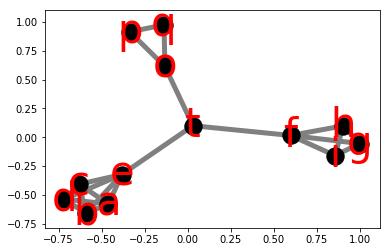

In [116]:
G = nx.Graph()
G.add_edge('a','b')
G.add_edge('a','c')
G.add_edge('a','d')
G.add_edge('a','e')

G.add_edge('b','c')
G.add_edge('b','d')
G.add_edge('b','e')

G.add_edge('c','d')
G.add_edge('c','e')

G.add_edge('d','e')

G.add_edge('e','t')
G.add_edge('f','t')


G.add_edge('f','g')
G.add_edge('f','h')
G.add_edge('f','i')

G.add_edge('g','h')
G.add_edge('h','i')
G.add_edge('g','i')

G.add_edge('t','o')
G.add_edge('o','p')
G.add_edge('o','q')
G.add_edge('p','q')



pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color = 'black')
nx.draw_networkx_edges(G, pos, width=5,arrowsize=30,edge_color = 'grey')
nx.draw_networkx_labels(G, pos, font_size=40, font_color='red')
c = nx.community.girvan_newman(G)
next(c)

In [117]:
next(c)

({'a', 'b', 'c', 'd', 'e'}, {'o', 'p', 'q', 't'}, {'f', 'g', 'h', 'i'})

In [119]:
nx.degree_assortativity_coefficient(G)

0.51111111111111